In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('USA_Housing.csv')
pd.set_option('display.float_format', '{:.2f}'.format)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36,1060193.79,USNS Williams\nFPO AP 30153-7653
4996,78491.28,7.00,6.58,4.02,25616.12,1482617.73,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.69,7.25,4.81,2.13,33266.15,1030729.58,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33,5.53,7.13,5.44,42625.62,1198656.87,USS Wallace\nFPO AE 73316


In [3]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.drop(columns=['Address'],inplace=True,axis=1)

In [22]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)


iqr = q3-q1
lower = (q1-1.5* iqr)
upper = (q3+1.5*iqr)

df = df[~((df < lower) | (df > upper)).any(axis=1)]
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.46,5.68,7.01,4.09,23086.80
1,79248.64,6.00,6.73,3.09,40173.07
2,61287.07,5.87,8.51,5.13,36882.16
3,63345.24,7.19,5.59,3.26,34310.24
4,59982.20,5.04,7.84,4.23,26354.11
...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36
4996,78491.28,7.00,6.58,4.02,25616.12
4997,63390.69,7.25,4.81,2.13,33266.15
4998,68001.33,5.53,7.13,5.44,42625.62


-----------------Avg. Area Income---------------------


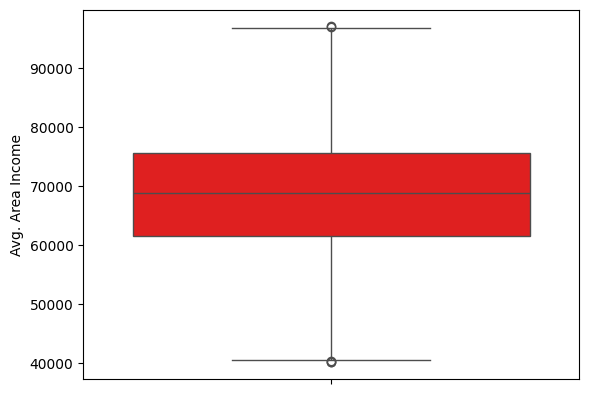

-----------------Avg. Area House Age---------------------


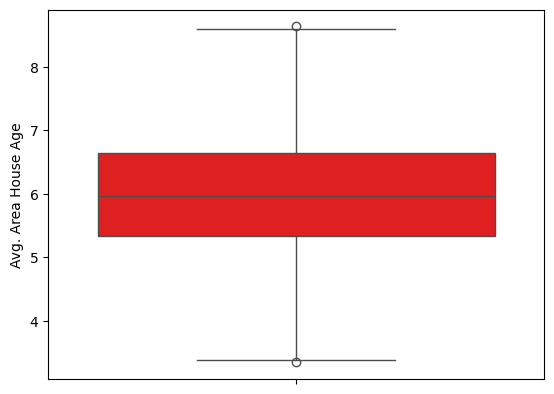

-----------------Avg. Area Number of Rooms---------------------


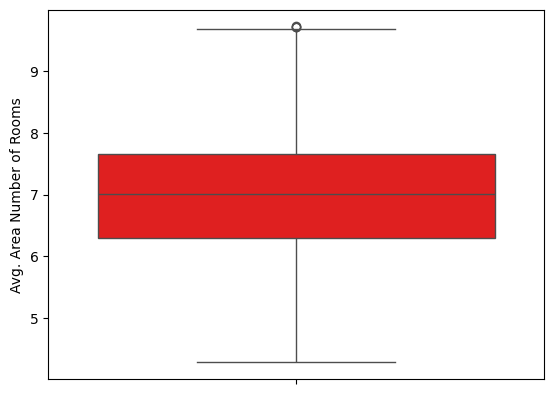

-----------------Avg. Area Number of Bedrooms---------------------


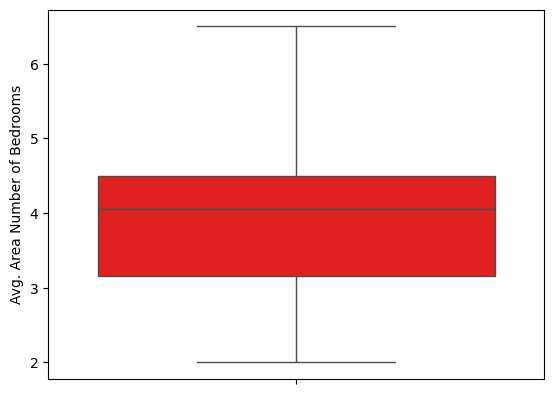

-----------------Area Population---------------------


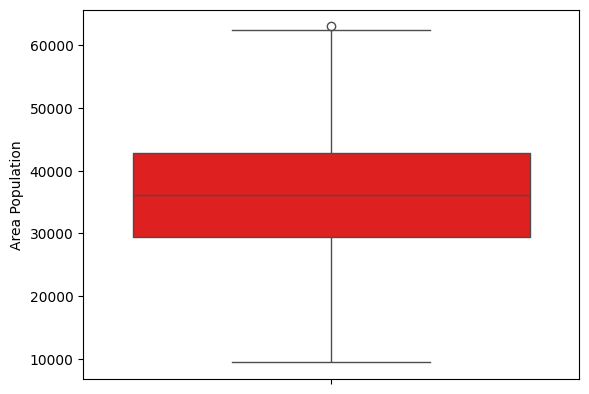

In [7]:
for i in df.columns:
    if i == 'Price':
        pass
    else:
        print(f'-----------------{i}---------------------')
        sns.boxplot(df[i],color='r')
        plt.show()

In [8]:
# df = df[(df['Price'] >= df['Price'].quantile(0.01)) & (df['Price'] <= df['Price'].quantile(0.99))]
# sns.boxplot(df['Price'])

<Axes: >

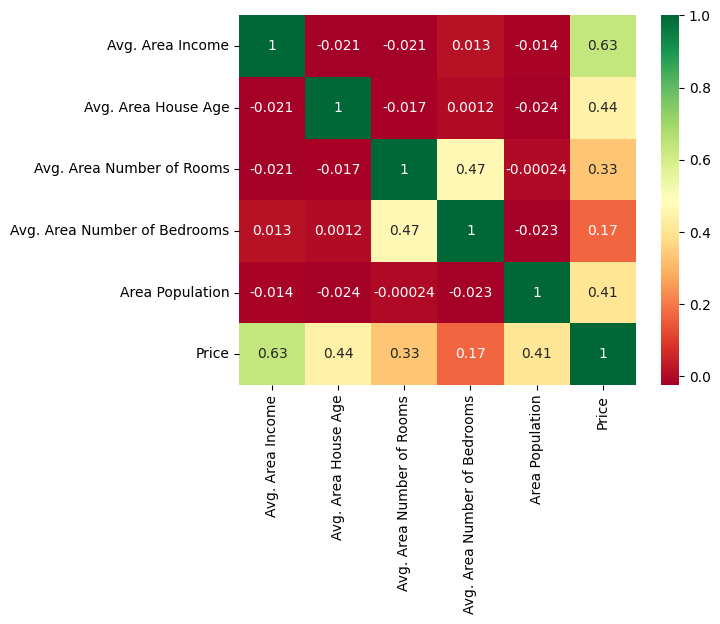

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df.pop("Price")
dfx = df

In [11]:
dfx_train,dfx_test,y_train,y_test = train_test_split(dfx,y,test_size=0.2,random_state=42)

In [12]:
scaler.fit(dfx_train)
x_train = scaler.transform(dfx_train)
x_test = scaler.transform(dfx_test)

In [13]:
df.nunique()

Avg. Area Income                4865
Avg. Area House Age             4865
Avg. Area Number of Rooms       4865
Avg. Area Number of Bedrooms     255
Area Population                 4865
dtype: int64

In [14]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_train = lr.predict(x_train)
lr_test = lr.predict(x_test)

print("Linear Regression:")

print("Train: ", r2_score(y_train,lr_train))

print("Test: ",r2_score(y_test,lr_test))

Linear Regression:
Train:  0.911537564238988
Test:  0.9126986629438516


In [15]:
dtree = DecisionTreeRegressor(max_depth=10)
dtree.fit(x_train,y_train)
dtree_train = dtree.predict(x_train)
dtree_test = dtree.predict(x_test)

print("Decisin Tree Regression:")

print("Train: ", r2_score(y_train,dtree_train))

print("Test: ",r2_score(y_test,dtree_test))

Decisin Tree Regression:
Train:  0.9504196492152022
Test:  0.7822919347445907


In [16]:
grad = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1)
grad.fit(x_train,y_train)
grad_train = grad.predict(x_train)
grad_test = grad.predict(x_test)

print("Gradient Boosting Regression:")

print("Train: ", r2_score(y_train,grad_train))

print("Test: ",r2_score(y_test,grad_test))

Gradient Boosting Regression:
Train:  0.9640875976246558
Test:  0.8903412938123741


In [17]:
xgb = XGBRegressor(n_estimators=5000,eta=0.005,max_depth=5,alpha=5,lamda=10)
xgb.fit(x_train,y_train)
xgb_train = xgb.predict(x_train)
xgb_test = xgb.predict(x_test)

print("XGBoost Regression:")

print("Train: ", r2_score(y_train,xgb_train))

print("Test: ",r2_score(y_test,xgb_test))

XGBoost Regression:
Train:  0.9618201434653806
Test:  0.8907399029330594


In [18]:
def prediction_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_Score:{r2*100}%')

    plt.scatter(actual, predicted, color='r')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], ls='--', color='k')
    plt.xlabel("actual value")
    plt.ylabel("predicted value")
    plt.title("Test analysis")
    plt.show

MSE:10083105986.347572
RMSE:100414.67017496782
MAE:80921.16373101628
R2_Score:91.1537564238988%


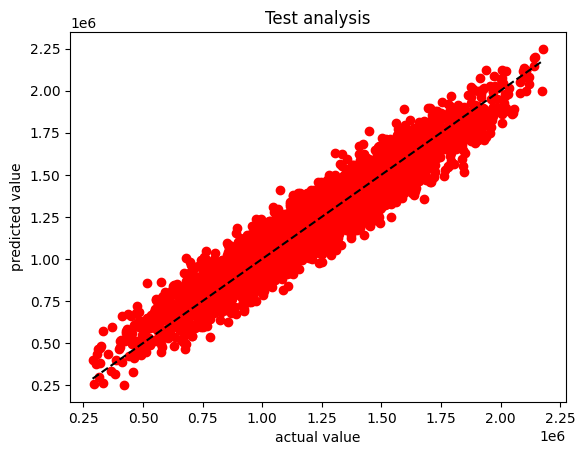

In [20]:
prediction_evaluation(y_train,lr_train)

MSE:10295321311.368689
RMSE:101465.86278827323
MAE:81137.45704516616
R2_Score:91.26986629438517%


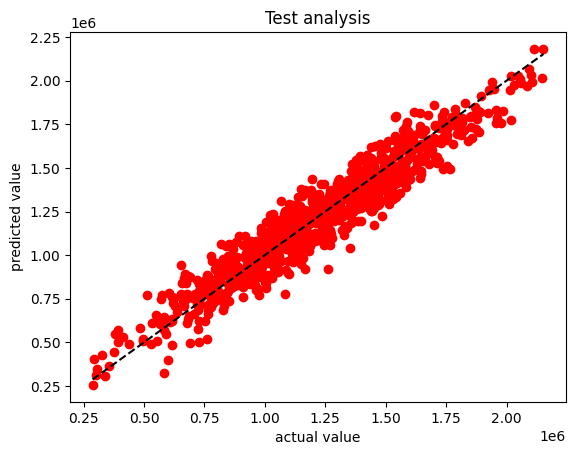

In [21]:
prediction_evaluation(y_test,lr_test)